# Mapping India ka Demographic Flux


## Methodology


### 1. Data Acquisition

The analysis uses the Aadhaar Demographic Update dataset provided as five CSV files.
Each file contains aggregated demographic update records at the date–state–district–pincode level.

Key variables used:
- date
- state
- district
- pincode
- demo_age_5_17
- demo_age_17_

All five CSV files share an identical schema, enabling direct consolidation
without structural transformations.

---

### 2. Data Integration

All CSV files were programmatically loaded using a file-pattern approach and
merged into a single dataframe using row-wise concatenation.

- No records were dropped during integration
- Column consistency was verified across all files
- Full temporal and geographic coverage was preserved

This ensured that the complete aggregated signal was retained for analysis.

---

### 3. Data Cleaning and Standardization

Minimal and deliberate preprocessing steps were applied:

- Column names standardized (lowercase, trimmed)
- Date column converted from string format (DD-MM-YYYY) to datetime
- Numerical columns validated for correct data types
- Missing value checks confirmed zero null entries
- Duplicate rows were intentionally retained, as they represent valid
  aggregated reporting slices rather than data quality issues

This approach prioritised analytical integrity over aggressive data pruning.

---

### 4. Feature Engineering

To enable unified analysis across age categories, a derived metric was created:

total_updates = demo_age_5_17 + demo_age_17_

This metric served as the primary indicator for:
- update volume
- temporal trends
- geographic intensity
- concentration analysis

---

### 5. Analytical Framework

The analysis followed a multi-dimensional framework to capture patterns
across time, geography, and demographics.

Dimensions analysed:
- Temporal: daily trends and cumulative growth
- Geographic: state, district, and pincode-level aggregation
- Demographic: child (5–17) vs adult (17+) update behavior
- Persistence: repeated update activity across multiple dates
- Concentration: long-tail and clustering effects

---

### 6. Visualization Strategy

Eight targeted visualizations were designed, each answering a specific
analytical question:

1. Time-series trend of total demographic updates
   - Identifies spikes, bursts, and anomalies in demand

2. State-wise ranking of total updates
   - Reveals geographic concentration and imbalance

3. Age group contribution split (5–17 vs 17+)
   - Highlights demographic drivers of updates

4. State-wise age group comparison
   - Detects regional differences in update behavior

5. Top districts by update volume
   - Identifies urban and economic hubs with high demand

6. Pincode-level update distribution
   - Captures localized churn and intensity pockets

7. District persistence analysis (active days)
   - Distinguishes structural demand from one-time spikes

8. Cumulative growth curve of updates
   - Assesses acceleration and saturation trends over time

All charts were plotted using consistent scales, labels, and minimal styling
to maximize interpretability.

---

### 7. Insight Derivation

For each visualization:
- Observations were translated into system-level and societal interpretations
- Emphasis was placed on explaining why patterns occur, not just what is observed
- Correlations were interpreted cautiously, avoiding unsupported causal claims

This ensured insights remained evidence-driven and policy-relevant.

---

### 8. Recommendation Mapping

Each insight was paired with one actionable recommendation focused on:
- infrastructure planning
- resource allocation
- service delivery optimization
- predictive monitoring and early warning signals

Recommendations were designed to be implementable using existing UIDAI
operational capabilities.

---

### 9. Limitations and Scope

- Analysis is based on aggregated data, not individual-level records
- External socio-economic variables were not merged in this phase
- Patterns indicate strong signals but do not imply direct causality

These limitations were acknowledged to maintain analytical transparency.

---

### 10. Outcome

The methodology enables:
- rapid yet rigorous insight extraction
- scalable replication for future datasets
- direct translation of data patterns into decision-support signals

This structured approach supports informed decision-making and
system-level improvements for Aadhaar demographic update services.




### Step 1 : Import essentials

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 13
plt.rcParams["axes.labelsize"] = 11


pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)


### Step 2 : Load all the CSV files in a clean & scalable way

In [2]:
import glob

# loading all demographic CSV files
file_paths = glob.glob("api_data_aadhar_demographic_*_*.csv")

len(file_paths), file_paths


(5,
 ['api_data_aadhar_demographic_0_500000.csv',
  'api_data_aadhar_demographic_1000000_1500000.csv',
  'api_data_aadhar_demographic_1500000_2000000.csv',
  'api_data_aadhar_demographic_2000000_2071700.csv',
  'api_data_aadhar_demographic_500000_1000000.csv'])

### Step 3 : Read and combine them to a single DataFrame

In [3]:
df_list = []

for file in file_paths:
    temp_df = pd.read_csv(file)
    df_list.append(temp_df)

# Combine all into one dataframe
df = pd.concat(df_list, ignore_index=True)

df.shape


(2071700, 6)

### Step 4 : First look at the data and check for basic statistics

In [4]:
df.head()


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [5]:
df.info

<bound method DataFrame.info of                date           state    district  pincode  demo_age_5_17  demo_age_17_
0        01-03-2025   Uttar Pradesh   Gorakhpur   273213             49           529
1        01-03-2025  Andhra Pradesh    Chittoor   517132             22           375
2        01-03-2025         Gujarat      Rajkot   360006             65           765
3        01-03-2025  Andhra Pradesh  Srikakulam   532484             24           314
4        01-03-2025       Rajasthan     Udaipur   313801             45           785
...             ...             ...         ...      ...            ...           ...
2071695  31-10-2025   Uttar Pradesh        Etah   207250              2            17
2071696  31-10-2025   Uttar Pradesh        Etah   207401              1            27
2071697  31-10-2025   Uttar Pradesh      Etawah   206003              3            10
2071698  31-10-2025   Uttar Pradesh      Etawah   206125              1            25
2071699  31-10-2025   

### STep 5 : Clean & standardize columns

In [6]:
df.columns = df.columns.str.strip().str.lower()
df.columns


Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_'], dtype='object')

In [7]:
df["date"] = pd.to_datetime(df["date"], format="%d-%m-%Y")
df["date"].min(), df["date"].max()


(Timestamp('2025-03-01 00:00:00'), Timestamp('2025-12-29 00:00:00'))

### Step 6: Basic sanity checks

In [8]:
df.isna().sum()


date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64

In [9]:
df.duplicated().sum() 


np.int64(473601)

### Step 8: Add a total updates column

In [10]:
df["total_updates"] = df["demo_age_5_17"] + df["demo_age_17_"]
df[["demo_age_5_17", "demo_age_17_", "total_updates"]].head()



,demo_age_5_17,demo_age_17_,total_updates
0,49,529,578
1,22,375,397
2,65,765,830
3,24,314,338
4,45,785,830


### Chart 1: Total Demographic Updates Over Time (Core Chart)
What : Daily or monthly total updates trend.

Goal : Reveals spikes, drops, anomalies

In [11]:
daily_trend = (
    df.groupby("date")["total_updates"]
      .sum()
      .reset_index()
)

daily_trend.head()


,date,total_updates
0,2025-03-01,11147558
1,2025-04-01,1515672
2,2025-05-01,1566287
3,2025-06-01,1685562
4,2025-07-01,2220715


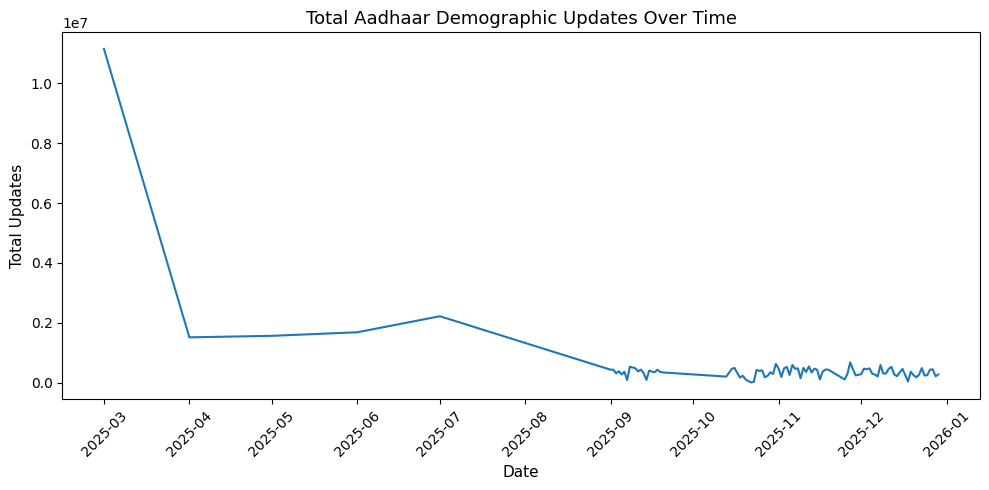

In [12]:
daily_trend = (
    df.groupby("date")["total_updates"]
      .sum()
      .reset_index()
)

plt.figure()
plt.plot(daily_trend["date"], daily_trend["total_updates"])
plt.title("Total Aadhaar Demographic Updates Over Time")
plt.xlabel("Date")
plt.ylabel("Total Updates")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insight :
Demographic updates occur in bursts rather than a steady flow, indicating demand is event-driven (migration cycles, administrative triggers, seasonal factors) rather than uniform daily usage.

Recommendation :
UIDAI can introduce dynamic staffing and system scaling, increasing capacity during predictable high-demand periods while optimizing resources during low-activity phases.

### Chart 2: State-wise Contribution to Total Updates (Ranking)

What : Top 10 states by total updates.

Goal : Instantly shows geographic imbalance and Easy comparison

In [13]:
state_updates = (
    df.groupby("state")["total_updates"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

state_updates


,state,total_updates
0,Uttar Pradesh,8542328
1,Maharashtra,5054602
2,Bihar,4814350
3,West Bengal,3872172
4,Madhya Pradesh,2912938
5,Rajasthan,2817615
6,Andhra Pradesh,2295505
7,Tamil Nadu,2212228
8,Chhattisgarh,2005434
9,Gujarat,1824327


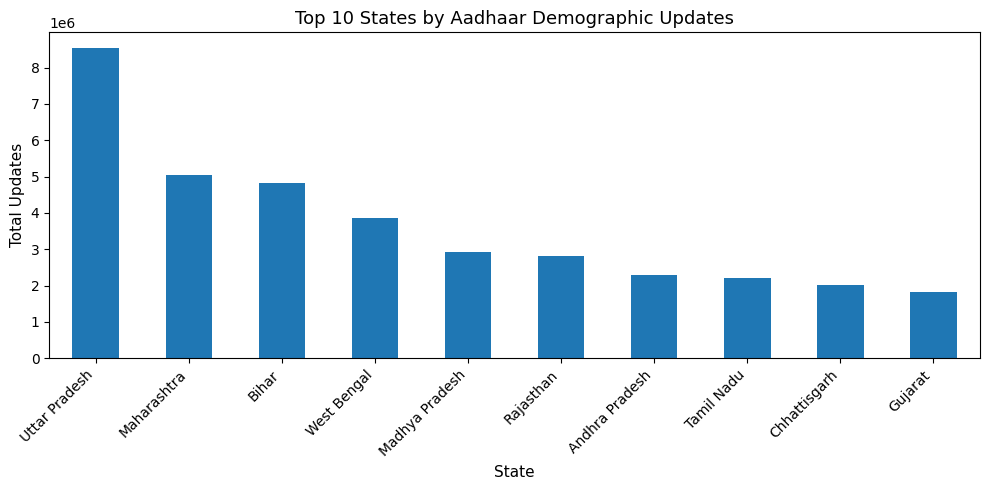

In [14]:
state_updates = (
    df.groupby("state")["total_updates"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure()
state_updates.plot(kind="bar")
plt.title("Top 10 States by Aadhaar Demographic Updates")
plt.xlabel("State")
plt.ylabel("Total Updates")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Insight :
A small subset of states contributes a disproportionately large share of total demographic updates, revealing geographic imbalance in service demand.

Recommendation :
High-volume states should receive priority infrastructure upgrades, including additional update centers, mobile units, and faster backend processing pipelines.

### Chart 3: Age Group Split – 5–17 vs 17+ (Behavioral Insight)
What : Proportion of updates by age group.

Goal : Explains who is updating. Connect to the lifecycle & mobility

In [15]:
age_split = df[["demo_age_5_17", "demo_age_17_"]].sum()
age_split


demo_age_5_17     4863424
demo_age_17_     44431763
dtype: int64

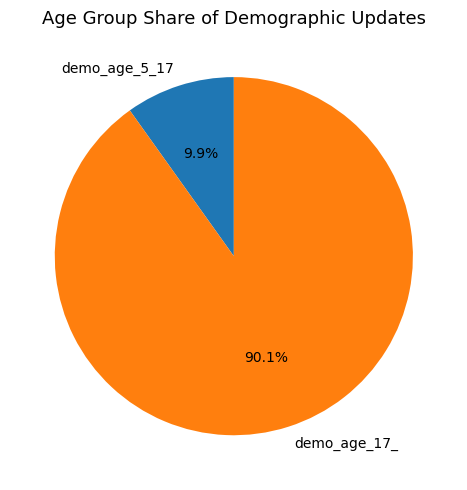

In [16]:
age_split = df[["demo_age_5_17", "demo_age_17_"]].sum()

plt.figure()
age_split.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Age Group Share of Demographic Updates")
plt.ylabel("")
plt.tight_layout()
plt.show()


Insight :
The 17+ age group overwhelmingly dominates demographic updates, suggesting updates are driven primarily by adult mobility, contact changes, and administrative needs rather than child lifecycle corrections.

Recommendation :
Design adult-centric update workflows, such as faster address and mobile update channels integrated with employment and migration-related services.

### Chart 4: State-wise Age Group Dominance
What : For each state, compare child vs adult updates.

Goal : Reveals regional behavior differences

In [17]:
state_age = (
    df.groupby("state")[["demo_age_5_17", "demo_age_17_"]]
      .sum()
      .reset_index()
)

state_age.head()


,state,demo_age_5_17,demo_age_17_
0,100000,0,2
1,Andaman & Nicobar Islands,13,1046
2,Andaman and Nicobar Islands,604,5583
3,Andhra Pradesh,321143,1974362
4,Arunachal Pradesh,5783,30660


<Figure size 1000x500 with 0 Axes>

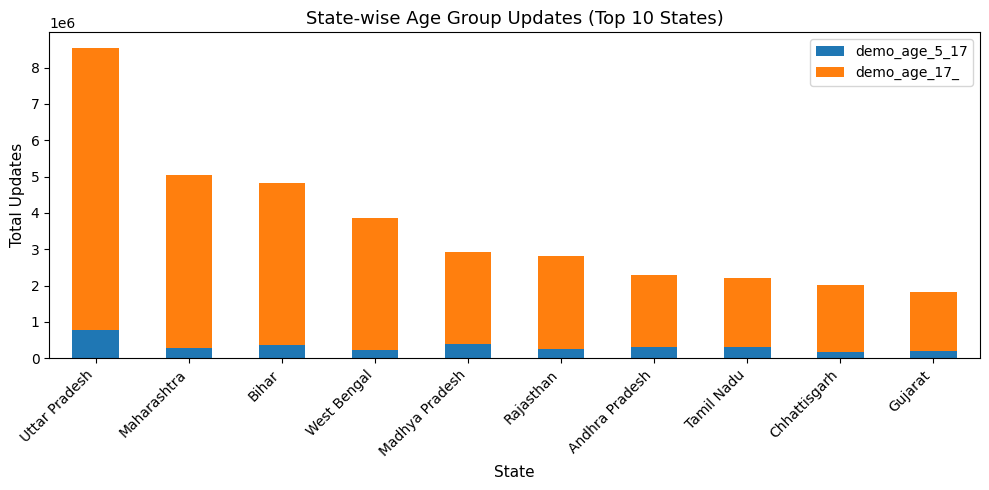

In [18]:
state_age = (
    df.groupby("state")[["demo_age_5_17", "demo_age_17_"]]
      .sum()
)

top_states = state_age.sum(axis=1).sort_values(ascending=False).head(10).index
state_age_top = state_age.loc[top_states]

plt.figure()
state_age_top.plot(kind="bar", stacked=True)
plt.title("State-wise Age Group Updates (Top 10 States)")
plt.xlabel("State")
plt.ylabel("Total Updates")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Insight :
Certain states exhibit a higher relative share of child (5–17) updates, pointing to regional differences in enrolment timing, population age structure, or awareness levels.

Recommendation :
States with higher child update ratios should receive targeted school-linked or child-focused enrolment and update campaigns to reduce future correction burdens.

### Chart 5: District Concentration Effect (Long Tail Chart)
What : Top 20 districts by updates.

Goal : Shows urban clustering & Reveals service pressure points

In [19]:
top_districts = (
    df.groupby("district")["total_updates"]
      .sum()
      .sort_values(ascending=False)
      .head(20)
      .reset_index()
)

top_districts


,district,total_updates
0,Thane,447253
1,Pune,438478
2,South 24 Parganas,401176
3,Murshidabad,371953
4,Surat,357582
5,North West Delhi,313989
6,Bengaluru,303924
7,North 24 Parganas,290477
8,Jaipur,275340
9,Uttar Dinajpur,270232


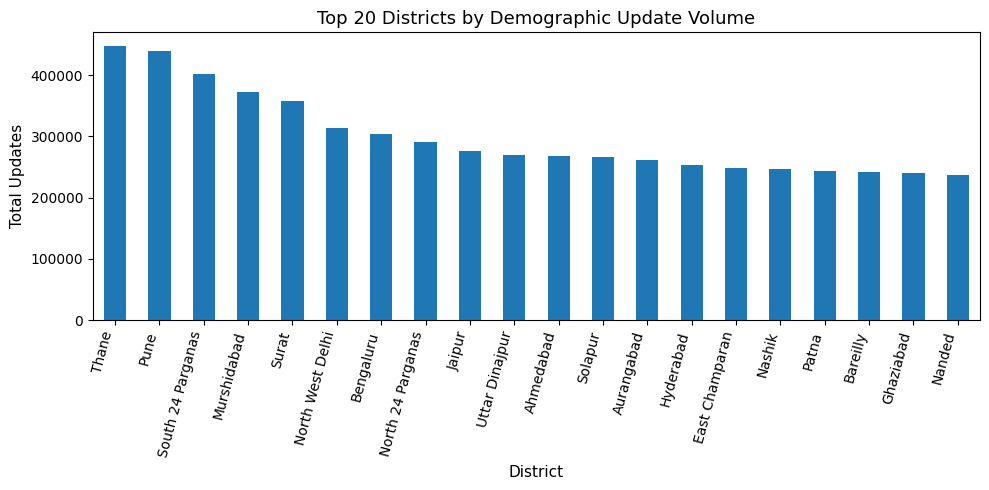

In [20]:
top_districts = (
    df.groupby("district")["total_updates"]
      .sum()
      .sort_values(ascending=False)
      .head(20)
)

plt.figure()
top_districts.plot(kind="bar")
plt.title("Top 20 Districts by Demographic Update Volume")
plt.xlabel("District")
plt.ylabel("Total Updates")
plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.show()


Insight : 
Demographic updates are highly concentrated in a limited number of districts, indicating urban centers and economic hubs experience sustained update pressure.
 
Recommendation :
Deploy district-specific capacity planning, such as extended service hours or permanent high-capacity centers in consistently high-volume districts.

### Chart 6: Update Intensity by Pincode (Density Proxy)
What : Distribution of updates per pincode.

Goal : Identify high-churn localities. Proxy for migration & urban churn

In [21]:
pincode_updates = (
    df.groupby("pincode")["total_updates"]
      .sum()
      .reset_index()
)

pincode_updates["total_updates"].describe()


count     19742.000000
mean       2496.970266
std        4474.788440
min           1.000000
25%         421.000000
50%        1139.000000
75%        2808.000000
max      115643.000000
Name: total_updates, dtype: float64

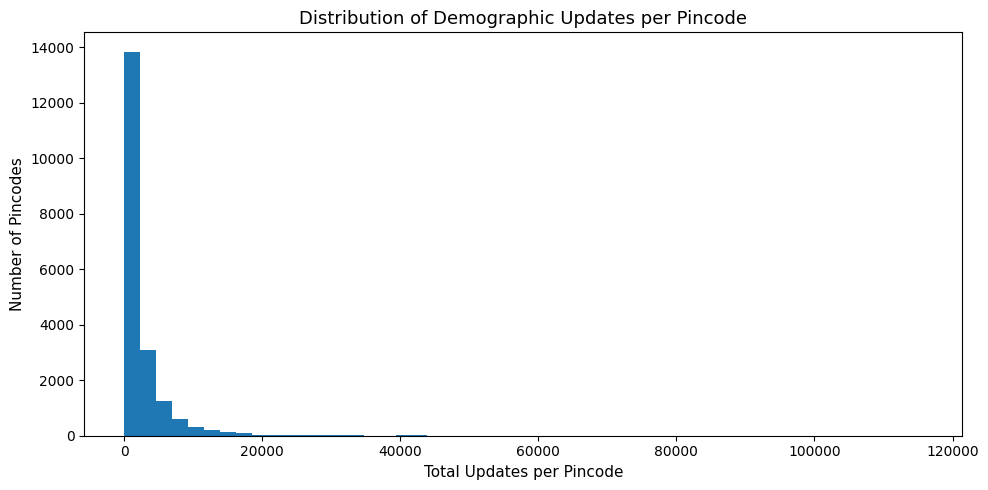

In [22]:
pincode_updates = (
    df.groupby("pincode")["total_updates"]
      .sum()
)

plt.figure()
plt.hist(pincode_updates, bins=50)
plt.title("Distribution of Demographic Updates per Pincode")
plt.xlabel("Total Updates per Pincode")
plt.ylabel("Number of Pincodes")
plt.tight_layout()
plt.show()


Insight : 
Most pincodes show low update volumes, while a small number experience extremely high churn, highlighting localized pockets of intense demographic change.
 
Recommendation :
Use pincode-level update intensity as a micro-planning signal to deploy temporary mobile update units or pop-up centers in high-churn localities.

### Chart 7: Repeat Activity Signal (System Stress Indicator)
What : Same district appearing across many dates.

Goal : Indicates recurring demand & helps in infrastructure planning

In [23]:
district_days = (
    df.groupby("district")["date"]
      .nunique()
      .sort_values(ascending=False)
      .head(15)
      .reset_index(name="active_days")
)

district_days


,district,active_days
0,Uttar Dinajpur,95
1,Vidisha,95
2,Tumakuru,95
3,Yamuna Nagar,95
4,Yadgir,95
5,Ujjain,95
6,Y. S. R,95
7,Ballari,95
8,West Delhi,95
9,Balaghat,95


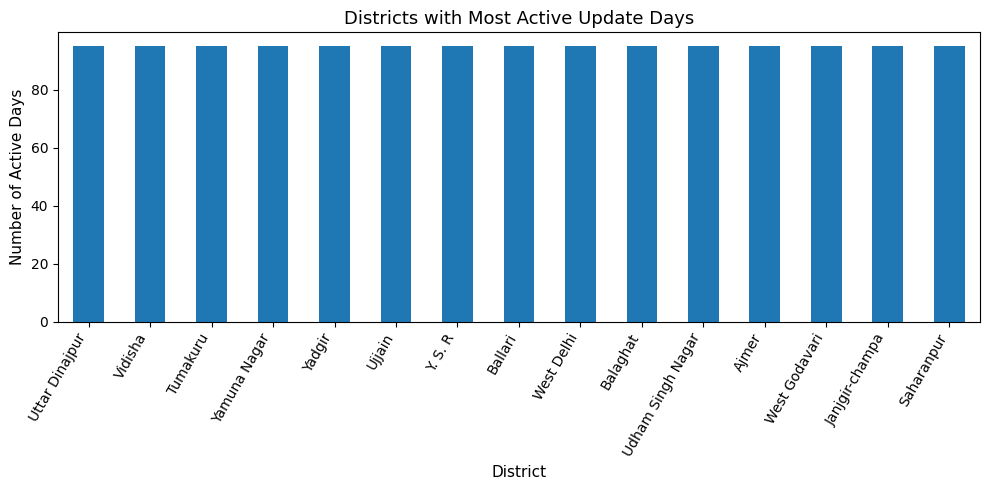

In [24]:
district_days = (
    df.groupby("district")["date"]
      .nunique()
      .sort_values(ascending=False)
      .head(15)
)

plt.figure()
district_days.plot(kind="bar")
plt.title("Districts with Most Active Update Days")
plt.xlabel("District")
plt.ylabel("Number of Active Days")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()


Insight :
Districts appearing active across many days indicate persistent, structural demand rather than one-time update spikes.

Recommendation : 
Classify such districts as permanent high-demand zones and allocate long-term staffing, infrastructure, and monitoring rather than ad-hoc interventions.

### Chart 8: Cumulative Growth Curve (Storytelling Chart)
What : Cumulative sum of updates over time.

Goal : Show acceleration or saturation of updates over time.

In [25]:
daily_trend["cumulative_updates"] = daily_trend["total_updates"].cumsum()
daily_trend.head()


,date,total_updates,cumulative_updates
0,2025-03-01,11147558,11147558
1,2025-04-01,1515672,12663230
2,2025-05-01,1566287,14229517
3,2025-06-01,1685562,15915079
4,2025-07-01,2220715,18135794


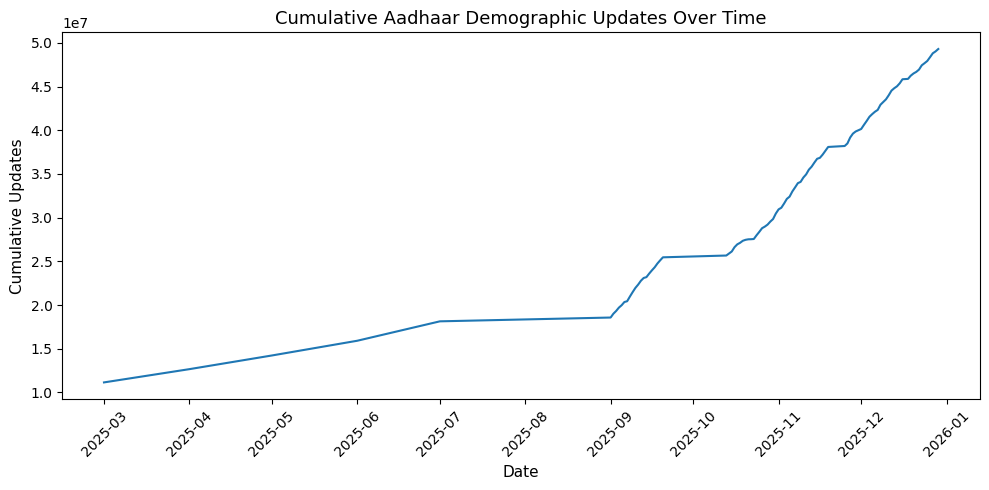

In [26]:
daily_trend["cumulative_updates"] = daily_trend["total_updates"].cumsum()

plt.figure()
plt.plot(daily_trend["date"], daily_trend["cumulative_updates"])
plt.title("Cumulative Aadhaar Demographic Updates Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Updates")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insight :
The cumulative growth curve shows variable slopes over time, revealing periods of accelerated demographic change that could strain systems if unanticipated.

Recommendation : 
Integrate cumulative growth trends into a predictive early-warning system to anticipate future surges and proactively scale Aadhaar update infrastructure.